<a href="https://colab.research.google.com/github/ferhatSF/Tensorflow-Studies/blob/master/Gradient_Descent_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gradient Descent Optimizer

TensorFlow 1.x Lazy Execution Model

Python 3.x

Numpy


by Ferhat Hatay

#SETUP

imports and
function definitions

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def generate_dataset(W_actual=1.5, b_actual=0.5, npoints=100,x_random=False,x_start=0, x_range=1,noise_amplitude=0.2):
    
    if x_random:
        x_data = np.random.randn(npoints)*x_range + x_start
    else:
        x_data = np.linspace(x_start, x_start+x_range, npoints)
    noise  = np.random.randn(*x_data.shape) * noise_amplitude
    y_data = x_data * W_actual + b_actual + noise
    
    x_true = np.linspace(min(x_data), max(x_data), 10)
    y_true = x_true * W_actual + b_actual
    
    return(x_data,y_data,x_true,y_true)

In [0]:
def linear_regression():
    
    x = tf.placeholder(tf.float32, [None,], name="x")
    y = tf.placeholder(tf.float32, [None,], name="y")

    W      = tf.Variable   (np.random.normal(), name='W')
    b      = tf.Variable   (np.random.normal(), name='b')
    y_pred = tf.add        (tf.multiply(W, x), b)
    loss   = tf.reduce_mean(tf.square(y_pred - y))

    return x,y,y_pred,loss,W,b

In [0]:
def optimize (x_batch, y_batch,iterations=10,learn_rate=0.1):
    
    x, y, y_pred, loss, W, b = linear_regression()
    
    loss_history = []
    W_history    = []
    b_history    = []
    
    optimizer = tf.train.GradientDescentOptimizer(learn_rate)
    train_op  = optimizer.minimize(loss)

    with tf.Session() as session:
        session.run(tf.global_variables_initializer())
        feed_dict = {x: x_batch, y: y_batch}
            
        for i in range(iterations):
            session.run(train_op, feed_dict)
            loss_history.append(loss.eval(feed_dict))
            W_history.append(session.run(W))
            b_history.append(session.run(b))
            
        y_pred_batch = session.run(y_pred, {x : x_batch})

    return y_pred_batch, loss_history, W_history, b_history

In [0]:
def plot_convergence (loss_history,W_history, b_history):
    
    plt.style.use('dark_background')
    
    fig = plt.figure(figsize=(12, 6))
    grid = plt.GridSpec(2, 1, hspace=0.2, wspace=0.2)
    ax1 = fig.add_subplot(grid[0, 0])
    ax2 = ax1.twinx()
#    ax1.get_shared_y_axes().join(ax1, ax2)
    ax3 = fig.add_subplot(grid[1, 0], sharex=ax1)


    color = 'tab:red'
    one,=ax1.plot(W_history, color=color,label="W history -> "+str(W_history[-1]))
    ax1.set_ylabel('W History', color=color)
    ax1.tick_params(axis='W history (W*x+b)', labelcolor=color)

    color = 'tab:blue'
    two,=ax2.plot(b_history, color=color,label="b history-> "+str(b_history[-1]))
    ax2.set_ylabel('b history', color=color)
    ax2.tick_params(axis='b', labelcolor=color)

    legend = ax2.legend(handles=[one, two], title=" Model: W * x + b ", fancybox=True,framealpha=0.8,facecolor="gray",frameon=True) 

    loss,=plt.plot(loss_history,label="LOSS history-> "+str(loss_history[-1]))
    ax3.set_xlabel('time (iterations)') 
    ax3.set_ylabel('LOSS History', color=color)
    ax3.tick_params(axis='LOSS history', labelcolor=color)

    legend = plt.legend(handles=[loss], title=" Model: W * x + b ", fancybox=True,framealpha=0.8,facecolor="gray",frameon=True) 
    plt.show()
    
    return

In [0]:
def plot_data (x_batch,y_batch,y_pred_batch,x_true,y_true):
    
    plt.style.use('dark_background')
    
    fig     = plt.figure(figsize=(13, 10))
    grid    = plt.GridSpec(5, 5, hspace=0.5, wspace=0.5)
    main_ax = fig.add_subplot(grid[:-1, 1:])
    y_hist  = fig.add_subplot(grid[:-1, 0], sharey=main_ax)
    x_hist  = fig.add_subplot(grid[-1, 1:], sharex=main_ax)
    
    data_set         = main_ax.scatter(x_batch, y_batch,      color="b", label="DATA SET",        s=50, alpha=0.6  )
    truth            = main_ax.scatter(x_true , y_true,       color='r', label='TRUTH LINEAR',    s=200)

    
    if len(y_pred_batch)==0:
        optimized_model, = main_ax.plot   (x_true, y_true, color='y', label="LINEAR MODEL", linewidth=4             )
    else:
        optimized_model, = main_ax.plot   (x_batch, y_pred_batch, color='cyan', label="OPTIMIZED MODEL", linewidth=4             )
    handles=[data_set,truth,optimized_model]
        
    main_ax.legend(handles=handles,fancybox=True,framealpha=0.8,facecolor="gray",frameon=True)
    main_ax.set_xlim([min(x_batch),max(x_batch)])
    main_ax.set_ylim([min(y_batch),max(y_batch)])
    main_ax.set_xlabel('X Coordinate')
    main_ax.set_ylabel('Y Coordinate')

    x_hist.hist(y_batch, 40, histtype='stepfilled',orientation='vertical',   color='b',alpha=0.6)
    x_hist.invert_yaxis()

    y_hist.hist(y_batch, 40, histtype='stepfilled',orientation='horizontal', color='b',alpha=0.6)
    y_hist.invert_xaxis()

    plt.show()
    
    return

#SETUP THE DATA

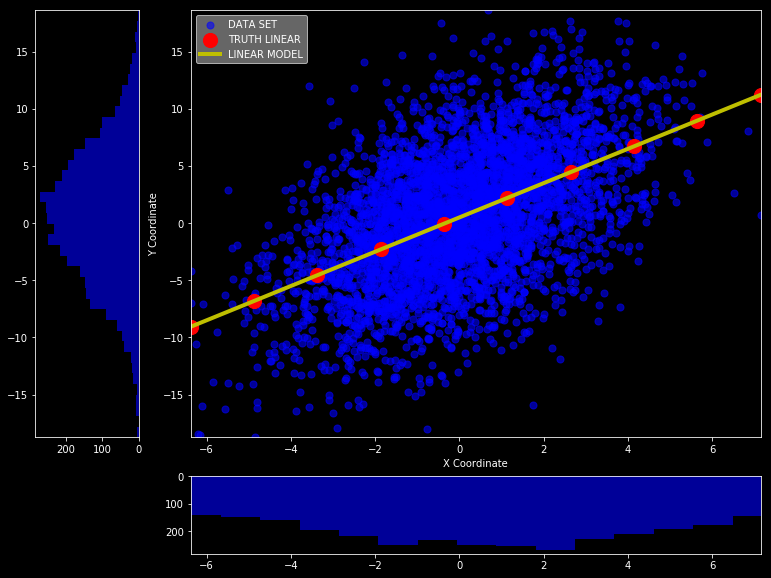

In [7]:
W_actual = 1.5 #@param {type:"slider", min:0, max:10, step:0.1}
b_actual = 0.5 #@param {type:"slider", min:0, max:10, step:0.1}

npoints = 4000 #@param {type:"slider", min:0, max:10000, step:100}
x_start = 0 #@param {type:"slider", min:-10, max:10, step:0.1}
x_range = 2 #@param {type:"slider", min:0.1, max:10, step:0.1}
x_random = True #@param {type:"boolean"}
noise_amplitude = 4 #@param {type:"slider", min:0, max:10, step:0.1}
x_data, y_data, x_true, y_true = generate_dataset(W_actual=W_actual, b_actual=b_actual, npoints=npoints, x_random=x_random,x_start=x_start, x_range=x_range, noise_amplitude=5.)

plot_data(x_data, y_data, [], x_true, y_true)

#OPTIMIZE

Instructions for updating:
Colocations handled automatically by placer.


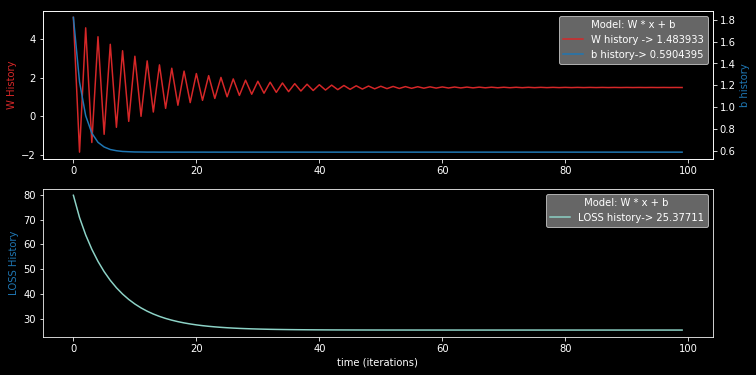

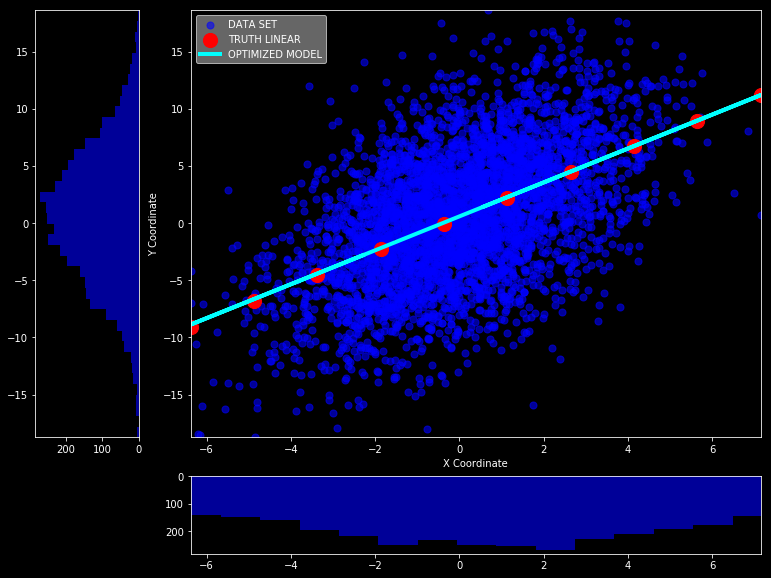

In [8]:
learn_rate = 0.24 #@param {type:"slider", min:0, max:1, step:0.01}
iterations = 100 #@param {type:"slider", min:10, max:10000, step:10}

y_pred_batch, loss_history, W_history, b_history = optimize(x_data,y_data,iterations=iterations,learn_rate=learn_rate)

plot_convergence(loss_history, W_history, b_history)
plot_data(x_data, y_data, y_pred_batch, x_true, y_true)